# Import Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import dataset
df = pd.read_csv("police.csv")

# Initial review of df

In [4]:
# check df
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
df.info()
# there is a column which is all nan, and some columns has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [6]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [7]:
# check df dim
df.shape

(91741, 15)

In [8]:
# check columns
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

# get unique of columns

In [9]:
# check unique values of df
df.nunique()

stop_date             3768
stop_time             1436
county_name              0
driver_gender            2
driver_age_raw          97
driver_age              78
driver_race              5
violation_raw           12
violation                6
search_conducted         2
search_type             24
stop_outcome             6
is_arrested              2
stop_duration            5
drugs_related_stop       2
dtype: int64

In [10]:
categorical_cols = ['driver_gender', 'driver_race', 'violation_raw', 'violation', 'search_type', 'stop_outcome']
for col in categorical_cols:
    print(f"{col} unique values:\n ", df[col].unique())
    print('-' * 50)

driver_gender unique values:
  ['M' 'F' nan]
--------------------------------------------------
driver_race unique values:
  ['White' 'Black' 'Asian' nan 'Hispanic' 'Other']
--------------------------------------------------
violation_raw unique values:
  ['Speeding' 'Call for Service' 'Equipment/Inspection Violation'
 'Other Traffic Violation' nan 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Violation of City/Town Ordinance'
 'Suspicious Person' 'Motorist Assist/Courtesy' 'Warrant'
 'Seatbelt Violation']
--------------------------------------------------
violation unique values:
  ['Speeding' 'Other' 'Equipment' 'Moving violation' nan
 'Registration/plates' 'Seat belt']
--------------------------------------------------
search_type unique values:
  [nan 'Incident to Arrest,Protective Frisk' 'Probable Cause'
 'Incident to Arrest' 'Probable Cause,Reasonable Suspicion'
 'Incident to Arrest,Inventory,Probable Cause'
 'Incident to Arrest,Inventory' 'Incident to Arrest,

# get value_counts of columns

In [11]:
categorical_cols = ['driver_gender', 'driver_race', 'violation_raw', 'violation', 'search_type', 'stop_outcome']
for col in categorical_cols:
    print(df[col].value_counts())
    print('-' * 50)

driver_gender
M    62895
F    23511
Name: count, dtype: int64
--------------------------------------------------
driver_race
White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: count, dtype: int64
--------------------------------------------------
violation_raw
Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: count, dtype: int64
--------------------------------------------------
violation
Speeding               48463
Moving violation       16224
Equipment              11020
Other           

# check boolean columns

In [12]:
bool_cols = ['search_conducted', 'is_arrested', 'drugs_related_stop']
for col in bool_cols:
    print(df[col].value_counts())
    print("-" * 50)

search_conducted
False    88545
True      3196
Name: count, dtype: int64
--------------------------------------------------
is_arrested
False    83479
True      2929
Name: count, dtype: int64
--------------------------------------------------
drugs_related_stop
False    90926
True       815
Name: count, dtype: int64
--------------------------------------------------


# Drop `county_name` which has only null values

In [13]:
df['county_name'].isnull().sum()

91741

In [14]:
# drop country_name feature
df.drop(columns= ['county_name'], inplace = True)

In [15]:
# check df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


# Handling Missing Values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [17]:
# mean imputation for numerical columns
numerical_columns = ['driver_age_raw', 'driver_age']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [18]:
# Example of mode imputation for categorical columns
categorical_columns = ['driver_gender', 'driver_race', 'violation_raw', 'violation', 'stop_outcome', 'is_arrested']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
# analyzing missing values
missing_values = df.isnull().sum()
missing_values

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            0
driver_age                0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           88545
stop_outcome              0
is_arrested               0
stop_duration          5333
drugs_related_stop        0
dtype: int64

# check `stop_date` columns and extract date, month, day

In [20]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
# extract date, month, day
df['year'] = df['stop_date'].dt.year
df['month'] = df['stop_date'].dt.month
df['day'] = df['stop_date'].dt.day

In [21]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month,day
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,18
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,23
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2,20
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,3,14


# Men or women were stopped more often for speeding :

In [22]:
df[(df['violation'] == 'Speeding')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month,day
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,18
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,23
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,3,14
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015,12,31
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015,12,31
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015,12,31
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015,12,31


In [23]:
df[(df['violation'] == 'Speeding')]['driver_gender'].value_counts()

driver_gender
M    38314
F    15482
Name: count, dtype: int64

# Does gender affect who gets searched during a stop ?

In [24]:
df.groupby('driver_gender')['search_conducted'].sum()

driver_gender
F     471
M    2725
Name: search_conducted, dtype: int64

In [25]:
df['search_conducted'].value_counts()

search_conducted
False    88545
True      3196
Name: count, dtype: int64

# Mean stop_duration

In [26]:
# check df
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month,day
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,2
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,18
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1,23


In [27]:
# check stop_duration values
df['stop_duration'].value_counts()

stop_duration
0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: count, dtype: int64

In [28]:
df['stop_duration'] = df['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 24, '30+ Min' : 45})

In [29]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,month,day
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,2005,1,2
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,2005,1,18
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,2005,1,23
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False,2005,2,20
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False,2005,3,14


In [30]:
df['stop_duration'].mean()

11.504669814596209

# Age Distribution for each violation

In [31]:
df.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11020.0,31.784133,11.394429,16.0,23.0,28.0,38.0,89.0
Moving violation,16224.0,36.112221,13.162021,15.0,25.0,34.0,46.0,99.0
Other,4317.0,39.392235,12.893097,16.0,28.0,39.0,49.0,87.0
Registration/plates,3432.0,32.804795,11.025729,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,53796.0,33.578194,12.158117,15.0,24.0,32.0,40.0,90.0


# Cross-tabulation for categorical variables

In [32]:
cross_tab = pd.crosstab(df['driver_gender'], df['violation'])
cross_tab

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15482
M,8533,13020,3627,2419,2317,38314


# Visualization

In [33]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
correlation_matrix

,driver_age_raw,driver_age,stop_duration,year,month,day
driver_age_raw,1.000000,-0.114335,-0.015753,0.043111,-0.001013,-0.001296
driver_age,-0.114335,1.000000,0.037389,0.011345,-0.019545,-0.001205
stop_duration,-0.015753,0.037389,1.000000,-0.088860,-0.008704,-0.005260
year,0.043111,0.011345,-0.088860,1.000000,-0.059881,0.008359
month,-0.001013,-0.019545,-0.008704,-0.059881,1.000000,-0.003176
day,-0.001296,-0.001205,-0.005260,0.008359,-0.003176,1.000000


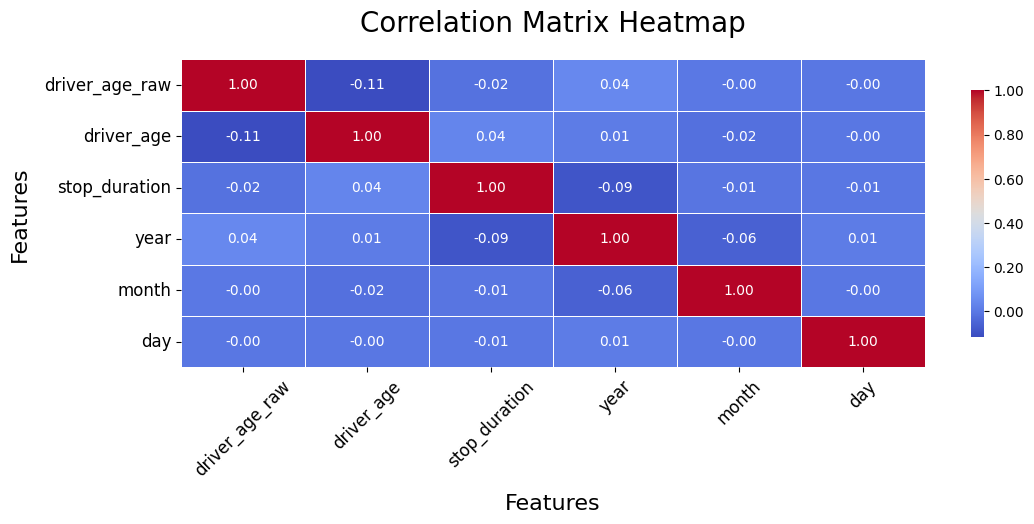

In [34]:
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8, 'format': '%.2f'})
plt.title('Correlation Matrix Heatmap', fontsize=20, pad=20)
plt.xlabel('Features', fontsize=16, labelpad=10)
plt.ylabel('Features', fontsize=16, labelpad=10)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

## Age distribution by driver age

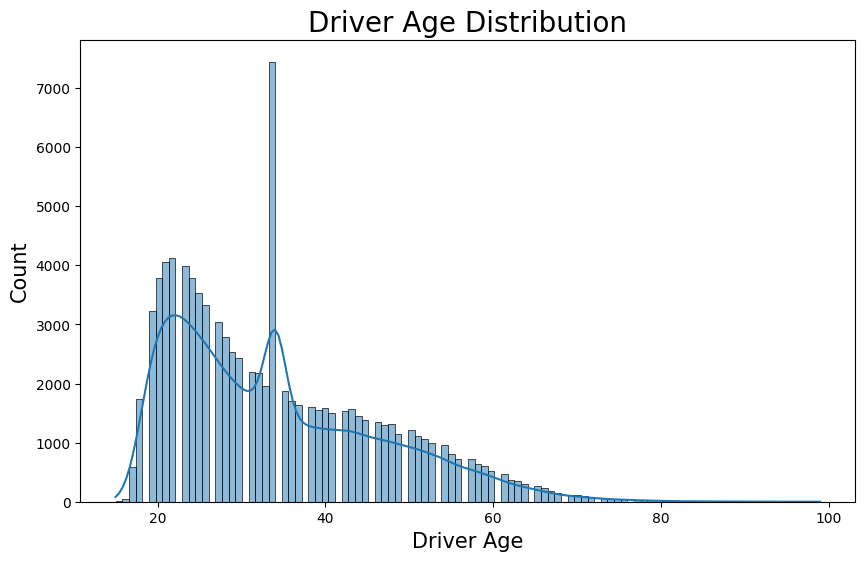

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['driver_age'], kde=True)
plt.title('Driver Age Distribution', fontsize = 20)
plt.xlabel("Driver Age", fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Analysis of search-related information based on various factors

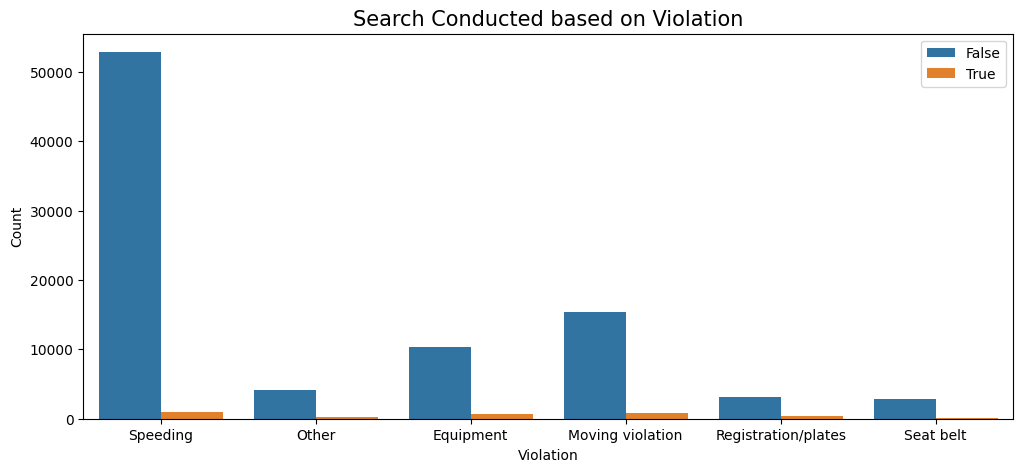

In [36]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'violation', hue = 'search_conducted', data = df)
plt.title("Search Conducted based on Violation", fontsize = 15)
plt.ylabel('Count', fontsize = 10)
plt.xlabel('Violation', fontsize = 10)
plt.legend(fontsize = 10)
plt.show()

# Stop duration analysis based on violation type

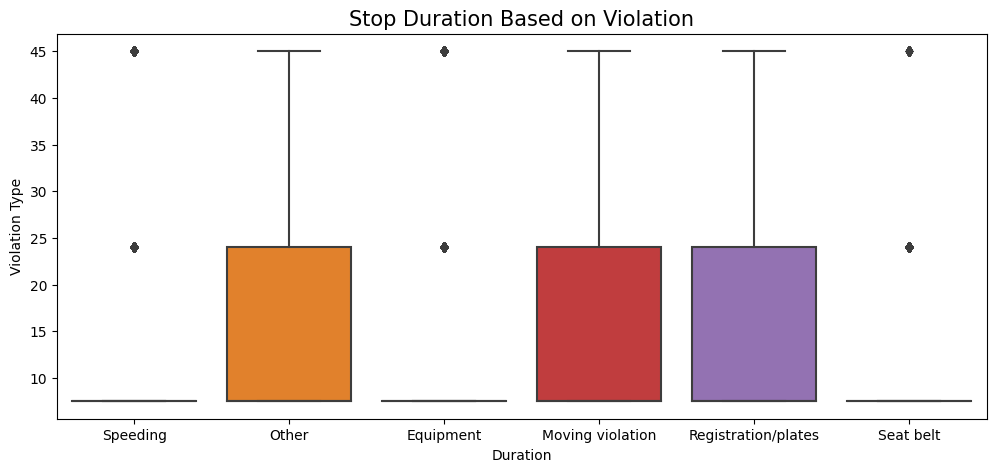

In [37]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'violation', y='stop_duration', data = df)
plt.title("Stop Duration Based on Violation", fontsize = 15)
plt.xlabel('Duration', fontsize = 10)
plt.ylabel('Violation Type', fontsize = 10)
plt.show()

# Stop Time

C:\Users\mrmhm\AppData\Local\Temp\ipykernel_17676\1654870410.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour


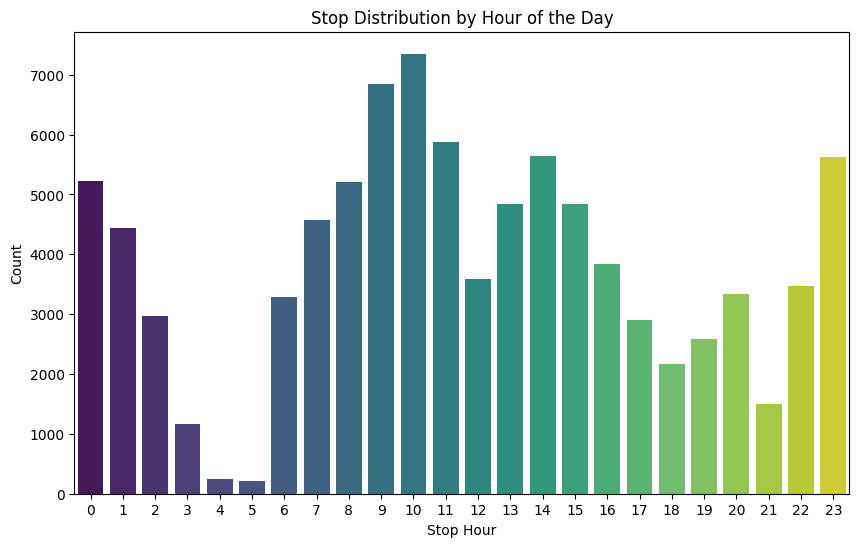

In [38]:
df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='stop_hour', data=df, palette='viridis')
plt.title('Stop Distribution by Hour of the Day')
plt.xlabel('Stop Hour')
plt.ylabel('Count')
plt.show()

# Analysis of drugs-related stops 

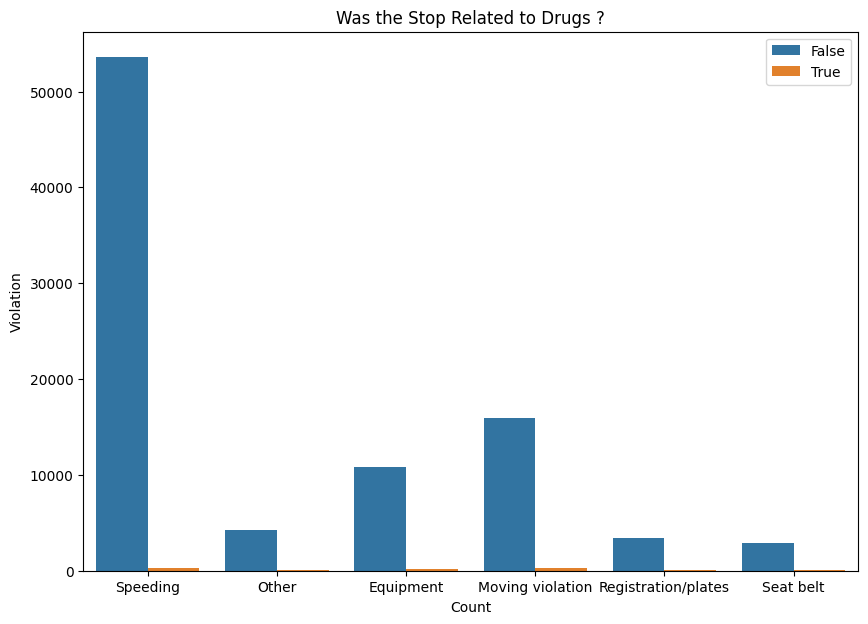

In [39]:
plt.figure(figsize = (10, 7))
sns.countplot(x='violation', hue='drugs_related_stop', data=df)
plt.title('Was the Stop Related to Drugs ?')
plt.xlabel ("Count")
plt.ylabel("Violation")
plt.legend()
plt.show()

# Bar plot for Violation Count

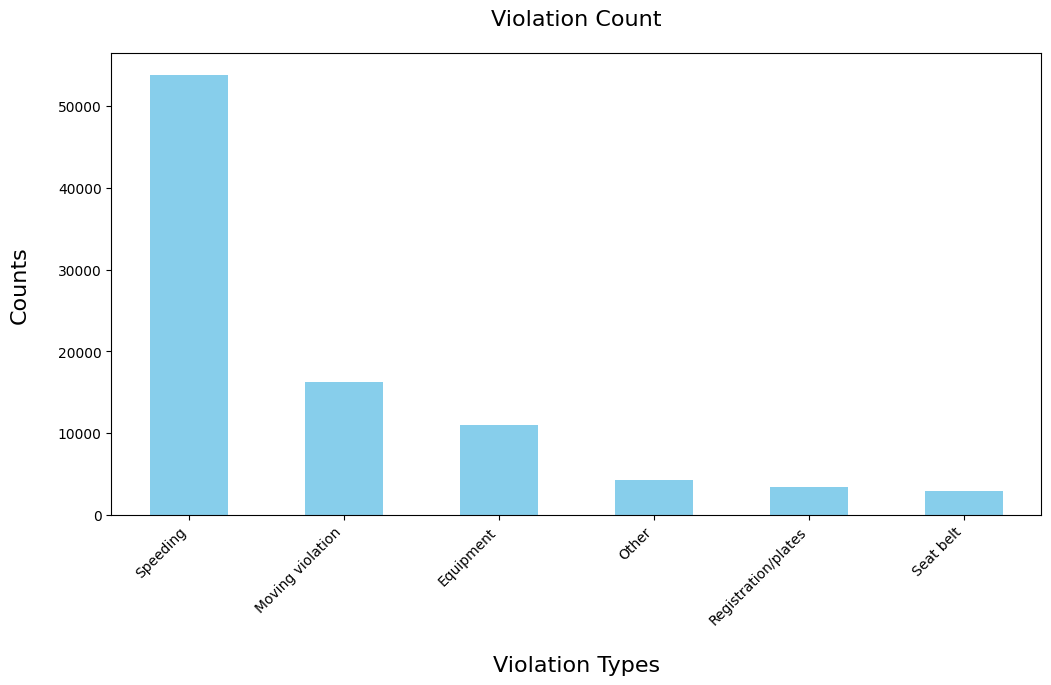

In [40]:
plt.figure ( figsize = (12, 6))
df['violation'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title("Violation Count", fontsize = 16, pad = 20)
plt.xlabel("Violation Types", fontsize = 16, labelpad = 20)
plt.ylabel("Counts", fontsize = 16, labelpad = 20)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.show()

# Pie Chart for driver race distribution

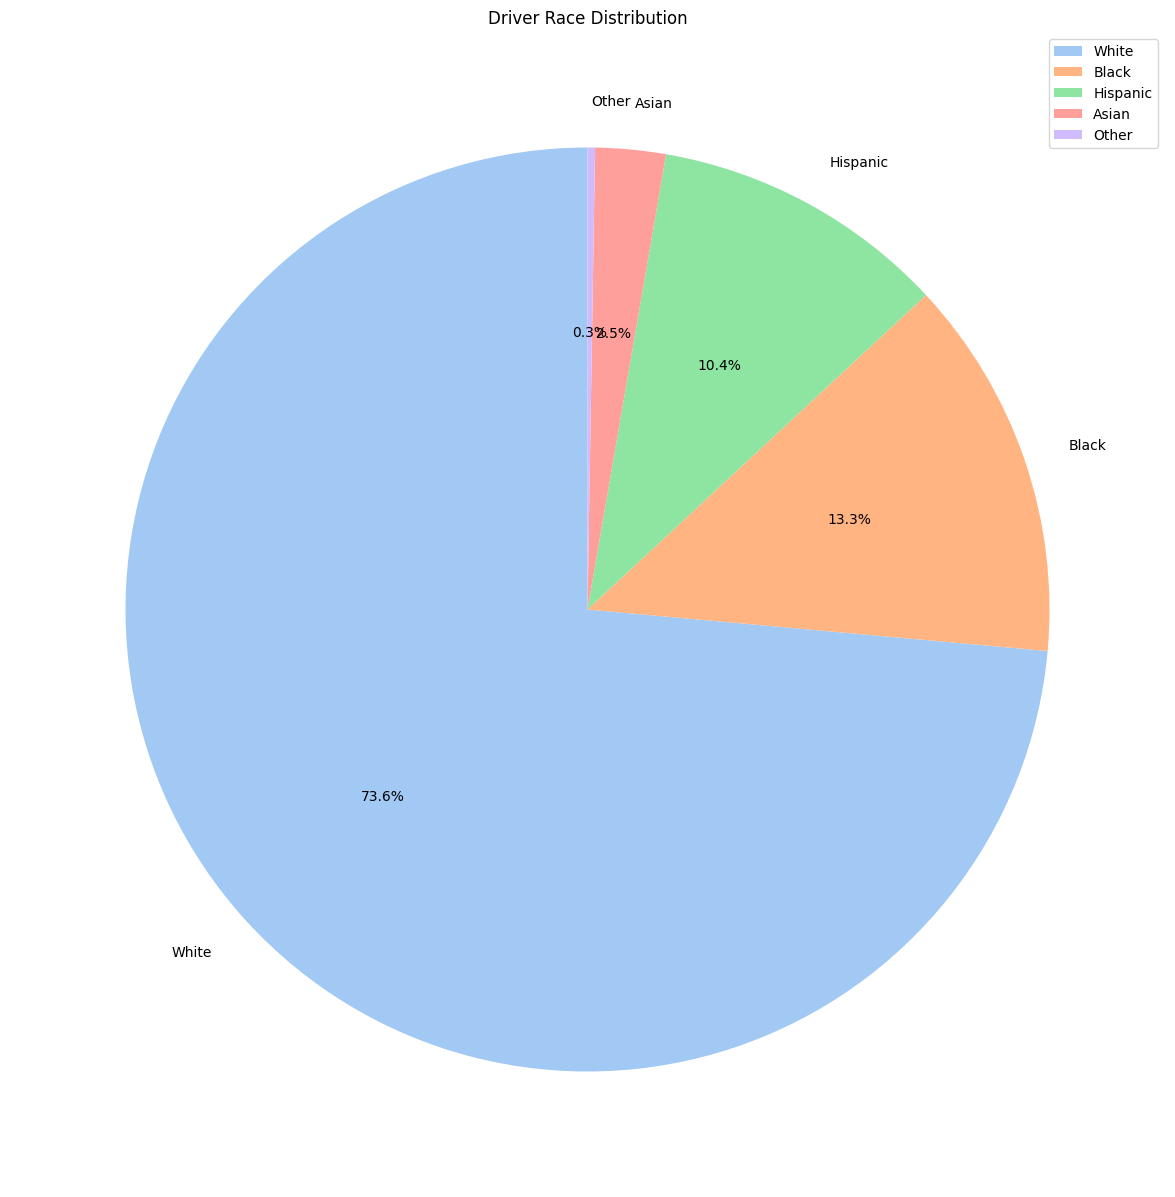

In [41]:
plt.figure(figsize=(15, 15))
df['driver_race'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = sns.color_palette('pastel'), startangle = 90)
plt.title('Driver Race Distribution')
plt.ylabel('')
plt.legend()
plt.show()

# Count Plot for search conducted based on gender

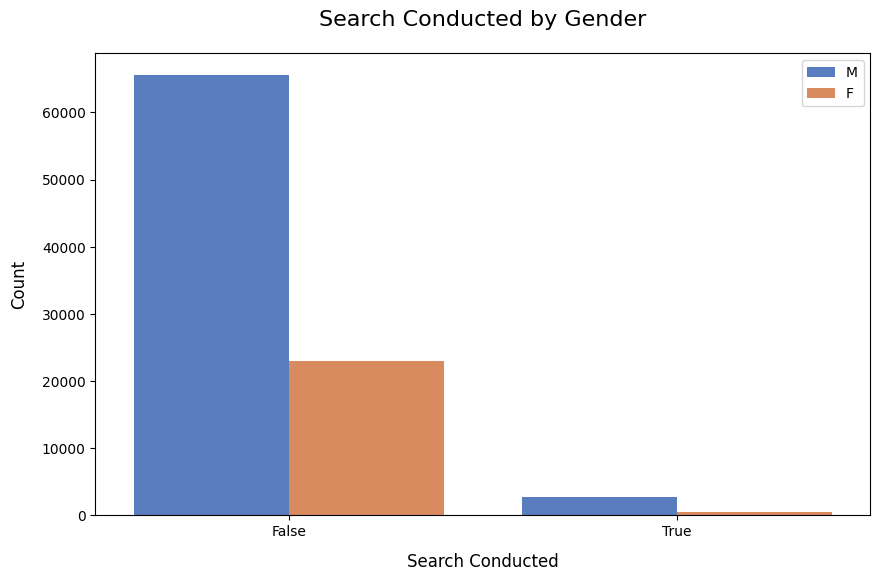

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='search_conducted', hue='driver_gender', data=df, palette='muted')
plt.title('Search Conducted by Gender', fontsize=16, pad=20)
plt.xlabel('Search Conducted', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.legend()
plt.show()

# Stacked Bar for stop outcome by gender

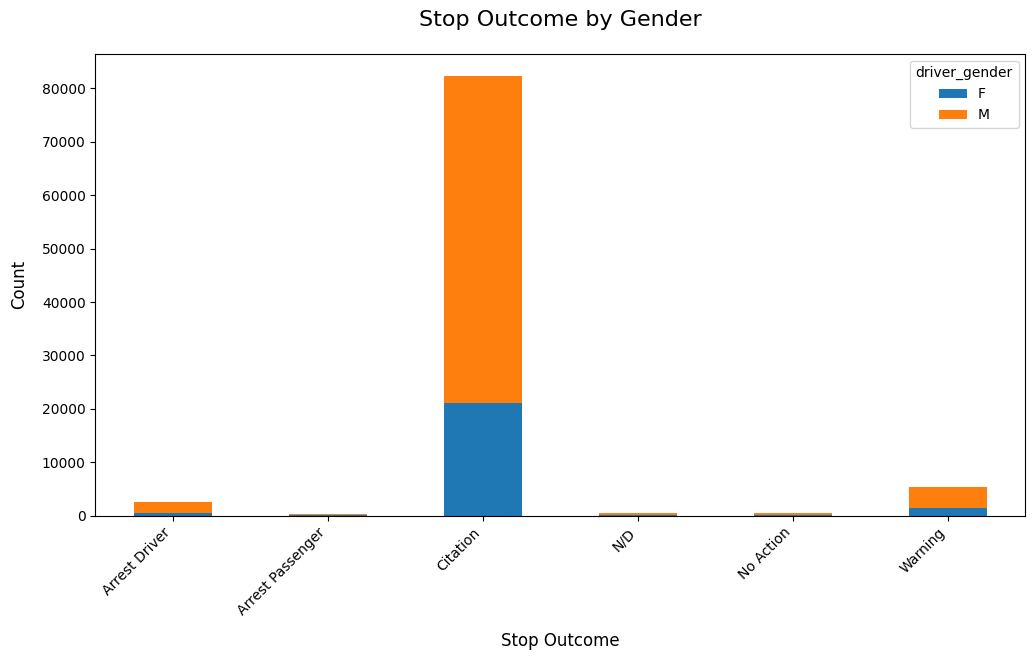

In [157]:
stop_outcome_gender = df.groupby(['stop_outcome', 'driver_gender']).size().unstack()
stop_outcome_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stop Outcome by Gender', fontsize=16, pad=20)
plt.xlabel('Stop Outcome', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Inferential Analysis

## Hypothesis Testing - Gender Bias in Searches:
* Hypothesis: There is no gender bias in searches during traffic stops.
* Test whether the proportion of searches conducted for males is significantly different from the proportion for females.

In [43]:
pd.crosstab(df['driver_gender'], df['search_conducted'])

search_conducted,False,True
driver_gender,,
F,23040,471
M,65505,2725


In [46]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['driver_gender'], df['search_conducted'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence of gender bias in searches.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of gender bias in searches.")

Reject the null hypothesis: There is evidence of gender bias in searches.


## Correlation Testing - Age and Stop Duration:
* Hypothesis: There is no correlation between the age of drivers and the duration of stops.
* Test whether there is a significant correlation between these two numerical variables.

In [48]:
from scipy.stats import pearsonr

sub_df = df[['driver_age', 'stop_duration']].dropna() # use .dropna to drop NaN values.
corr, p_value = pearsonr(sub_df['driver_age'], sub_df['stop_duration'])

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between age and stop duration.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between age and stop duration.")

Reject the null hypothesis: There is a significant correlation between age and stop duration.


## Comparing Means - Search Duration for Different Violations (ANOVA Analysis):
* Hypothesis: The mean search duration is the same for different types of violations.
* Test whether there are significant differences in mean search duration between different violation types.

In [49]:
from scipy.stats import f_oneway

# Filter relevant columns and drop missing values
search_duration_data = df[['violation', 'stop_duration']].dropna()

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[search_duration_data[search_duration_data['violation'] == violation]['stop_duration'] for violation in search_duration_data['violation'].unique()])

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in search duration for different violations.")
else:
    print("Fail to reject the null hypothesis: No significant differences in search duration for different violations.")

Reject the null hypothesis: There are significant differences in search duration for different violations.


## Comparing Proportions - Search Outcomes by Gender:
* Null Hypothesis: The proportion of positive search outcomes is the same for both genders.
* Alternative Hypothesis: There is a significant difference in the proportion of positive search outcomes between genders.

In [53]:
# crosstab of driver_gender and search_coducted with mean of is_arrested
pd.crosstab(df['driver_gender'], df['search_conducted'], values=df['is_arrested'], aggfunc='mean')

search_conducted,False,True
driver_gender,,
F,0.018663,0.352442
M,0.021464,0.340183


In [54]:
from statsmodels.stats.proportion import proportions_ztest

# Create a contingency table for search outcomes by gender
contingency_table = pd.crosstab(df['driver_gender'], df['search_conducted'], values=df['is_arrested'], aggfunc='mean')

# Perform a two-proportion z-test
stat, p_value = proportions_ztest(contingency_table[True], contingency_table.sum(axis=1), alternative='two-sided')

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in search outcomes between genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference in search outcomes between genders.")

Fail to reject the null hypothesis: No significant difference in search outcomes between genders.


## Regression Analysis - Predicting Stop Duration:
* Investigate the relationship between numerical predictors (e.g., driver age) and the target variable (stop duration).

In [55]:
import statsmodels.api as sm

# Drop rows with missing values in relevant columns
regression_data = df[['driver_age', 'stop_duration']].dropna()

# Add a constant term to the predictors
regression_data = sm.add_constant(regression_data)

# Fit a linear regression model
model = sm.OLS(regression_data['stop_duration'], regression_data[['const', 'driver_age']])
result = model.fit()

# Check regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          stop_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     121.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           4.08e-28
Time:                        20:16:17   Log-Likelihood:            -3.1157e+05
No. Observations:               86406   AIC:                         6.231e+05
Df Residuals:                   86404   BIC:                         6.232e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6133      0.087    122.657      0.0

####  ___Interpretation___:  
* The model suggests a very weak positive relationship between driver_age and stop_duration. However, the R-squared value is extremely low, indicating that the model does not explain much of the variability in stop durations.

* The statistically significant p-values for both const and driver_age suggest that the model as a whole is significant and that the driver's age has a statistically significant effect on stop duration.

* While the statistical significance is achieved due to the large sample size, the practical significance (effect size) may be small, as suggested by the low R-squared value.